# Neural Networks Lab

> Author: Matt Brems (DC)

In this lab, we are going to find out why neural networks are so good at what they do. Specifically, we'll do three things:
1. Build and plot a "complicated, wiggly" function. This function could resemble any complicated real-world process that we would like to be able to model.
2. Build a neural network from scratch that very closely approximates this function. (That is, the predicted values from the neural network are very, very close to the true values from the "real" function.)
3. Understand the reason why neural networks are great, called the _Universal Approximation Theorem_.

**Optional Video**: If you want a visual refresher on neural networks and their building blocks, head to [this link](https://www.youtube.com/watch?v=aircAruvnKk) and watch the 3Blue1Brown video on "But what *is* a Neural Network?" It's a **phenomenal** 20-minute introduction to solidify the building blocks of a neural network. (This is optional, but probably worth your time!)

**Required Reading**: Head over to [this site](http://neuralnetworksanddeeplearning.com/chap4.html) and read from the beginning of the page until the "Many Input Variables" section.

#### Recommended Order of Reading
The introduction and the "Two Caveats" section are pretty mathematical in nature. I think this is a great resource, but wish that the author didn't start off with a mathematical theorem. If I were reading this page, I would:
- skim the introduction,
- skip the "Two Caveats" section,
- read the "Universality with One Input and One Output" section,
- go back and read the introduction,
- then go back and read the "Two Caveats" section.

(You do not need to read the "Many Input Variables" section and beyond but are certainly welcome to do so!)

**Problem 1:** Examine the image below. This shows a small neural network.

<img src="./images/weight_bias.jpg" alt="drawing" width="400"/>

In this image:
- How many input nodes are there?
- How many hidden nodes are there?
- How many hidden layers are there?
- How many output nodes are there?
- What does $w$ mean? 
- While only one is explicitly drawn on the diagram, how many values of $w$ would we expect in this neural network?
- What does $b$ mean? 
- While only one is explicitly drawn on the diagram, how many values of $b$ would we expect in this neural network?

**Answer:**
*   No. of input nodes: 1
*   No. of hidden nodes: 2
*   No. of hidden layers: 1
*   No.of output nodes : 1
*   w means weight accompanying the node. Can be thought of as the coefficient for the node(Beta)
*   We would expect 4 weights in the neural network
*   b is the bias
*   we could expect 2 values for bias




**Problem 2:** For a sigmoidal activation function to closely resemble a step function, how would you describe the values of $w$ and $b$?

_Hint:_ Try playing around with the applets on the page to test how different parts of the perceptron affect the output.

_Note:_ In an attempt to make things easier, the article defines $s = \frac{−b}{w}$. The author's goal is to only describe one parameter $s$ instead of describing $b$ and $w$. I find this notation confusing, because that notation only applies to this article and isn't used elsewhere. I'm going to stick with $b$ and $w$.



**Answer:**
The sigmoid function can be approximated as a step function by increasing the w to a reasonably large function.The position of the step is proportional to b, and inversely proportional to w.

**Problem 3**: 
The author asks you to find values of $h_i$ that make your neural network closely approximate $f(x)$. Record your values of $h_i$ here and your best "average deviation" score.
- Note $h$ is simply a weight. The author is calling it $h$ to correpond to height, but it's just a weight corresponding to the connection between the hidden layer and the output layer.

**Answer:**

- h1 = -1.2
- h2 = -1.4
- h3 = 0
- h4 = -1.2
- h5 = 1.1

- average deviation = 0.41

**Problem 4**: Build the neural network from your work in Problem 3 here.

A few things to keep in mind:
- How many inputs are there? 
- How many outputs are there?
- How many neurons are in the hidden layer? 
- In order to create a step function at a specific value of $x$:
    - what should the value of $w$ be?
    - what should the value of $b$ be?
    - use a [sigmoid activation function](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions).
- What do the values of $h_i$ represent?
- Use an [sigmoid activation function](https://en.wikipedia.org/wiki/Activation_function#Comparison_of_activation_functions) on the last layer.

The values of $h$ on this diagram are **not correct**, but this image may be helpful to you as you plan out your network!

<img src="./images/network.jpg" alt="drawing" width="400"/>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Define a sigmoid activation function.
def sigmoid_activation(x):
  return 1/(1+np.exp(-x))

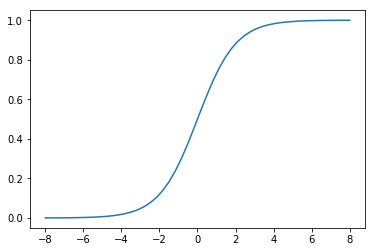

In [13]:
# Plot your activation function so that it looks correct.
x_val = np.linspace(-8, 8, 50)
y_val = [sigmoid_activation(x) for x in x_val]
plt.plot(x_val, y_val)

In [0]:
# Define a function that will take in your weight (w)
# and where you want the step to occur, then solve for
# the bias.

def solve_for_bias(w, step):
  return -1*(w*step)

In [0]:
# Set up model structure (topology) and define the weights and biases.


# Specify weights and biases from input to hidden layer.
steps = [0, .2, .2, .4, .4, .6, .6, .8, .8, 1.0]
bias_hidden = [solve_for_bias(1000, x) for x in steps]
weights_hidden = [1000]*10


# Remember: what are our values of weights from the hidden layer to the output layer?
# These are the values of h that we got!
weights_output = [-1.2, 1.2, -1.4, 1.4, -.2, .2, -1, 1, 1.1, -1.1]
bias_output = [solve_for_bias(weights_output[i], steps[i]) 
               for i in range(len(steps))]

In [0]:
# Define function to run the network:
def run_network(x):
    
    # Define your input value. This should just be one value.
    input_value = x
    
    # Calculate the value of the nodes in the hidden layer.
    Z_hidden = [weights_hidden[i]*input_value+bias_hidden[i] 
                for i in range(len(weights_hidden))]
    
    # Use your activation function to transform the value of your nodes.
    activation_hidden = [sigmoid_activation(z) for z in Z_hidden]

    # Calculate the value of the nodes in the output layer.
    Z_output = [activation_hidden[i]*weights_output[i]+bias_output[i]
                for i in range(len(activation_hidden))]
    
    # Use your activation function to transform the value of your output node.
    activation_output = sigmoid_activation(sum(Z_output))
    
    # Return the output of your network!
    return activation_output

**Problem 5**: Now that we've built our neural network, let's evaluate the performance of it!


- Use `np.linspace` to generate 1000 values of $x$ between 0 and 1. 
- Your $y$ values are the actual observed values of $f(x)=0.2+0.4x^2+0.3x\sin(15x)+0.05\cos(50x)$ for each of the $x$ that you generated using `np.linspace`. Generate $y$ (using the true function $f(x))$ for all values of $x$.
- Your $\hat{y}$ in this case are your predicted values from your neural network for each of the $x$ that you generated using `np.linspace`.
- Visually compare $y$ and $\hat{y}$ by plotting both on one grid.
- Compare $y$ and $\hat{y}$ using mean squared error.

Recall that mean squared error is given by:

$$
\frac{1}{n}\sum_{i=1}^n (\hat{y}-y)^2
$$

In [24]:
import math
# Generate values of X from 0 to 1.
x_values = np.linspace(0, 1, 1000)

# Generate values of Y for each X from 0 to 1.
def f(x): 
    return (0.05*math.cos(50*x))+ (0.3*x*math.sin(15*x)) + 0.2 + (0.4*(x**2))

y = [f(x) for x in x_values]

# Generate values of Y-hat for each X from 0 to 1.
y_hat = [run_network(x) for x in x_values]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


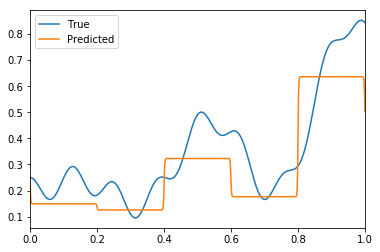

In [25]:
# Plot your predicted and observed values.
plt.plot(x_values, y, label = 'True')
plt.plot(x_values, y_hat, label = 'Predicted')
plt.legend()
plt.xlim((0,1));

In [26]:
# Calculate MSE.
MSE = 1/len(x_values)*sum([(y_hat[i]-y[i])**2 for i in range(len(x_values))])
MSE


0.014920165198554242

Note: This will vary depending on your values of $h$ - your MSE may differ from others' MSE!

**Problem 6**: Suppose you wanted to increase the performance of this neural network. How might you go about doing so?

**Answer:**

Add more hidden layers, Add more nodes

**Problem 7**: Summarize the Universal Approximation Theorem and show that it explains why neural networks can perform very well. (Don't copy it; use your own words!)

**Answer:**
The neural network is able to approximate all sorts of functions and therefore can take any shape. This indicates why neural networks perform so well.